In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#reading the csv data into notebook or dataset
df = pd.read_csv('data/USA_Housing.csv')

In [12]:
#viewing the first 7 rows of the dataset
df.head(7)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."


In [14]:
# Display concise summary of the DataFrame, including:
# - Column names and data types
# - Number of non-null entries per column
# - Memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
# Generate descriptive statistics for numerical columns 
# (count, mean, std, min, quartiles, max)
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
# Check for missing values in each column and return the total count per column
df.isnull().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [20]:
# Get all column names in the DataFrame as a Python list
df.columns.to_list()


['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population',
 'Price',
 'Address']

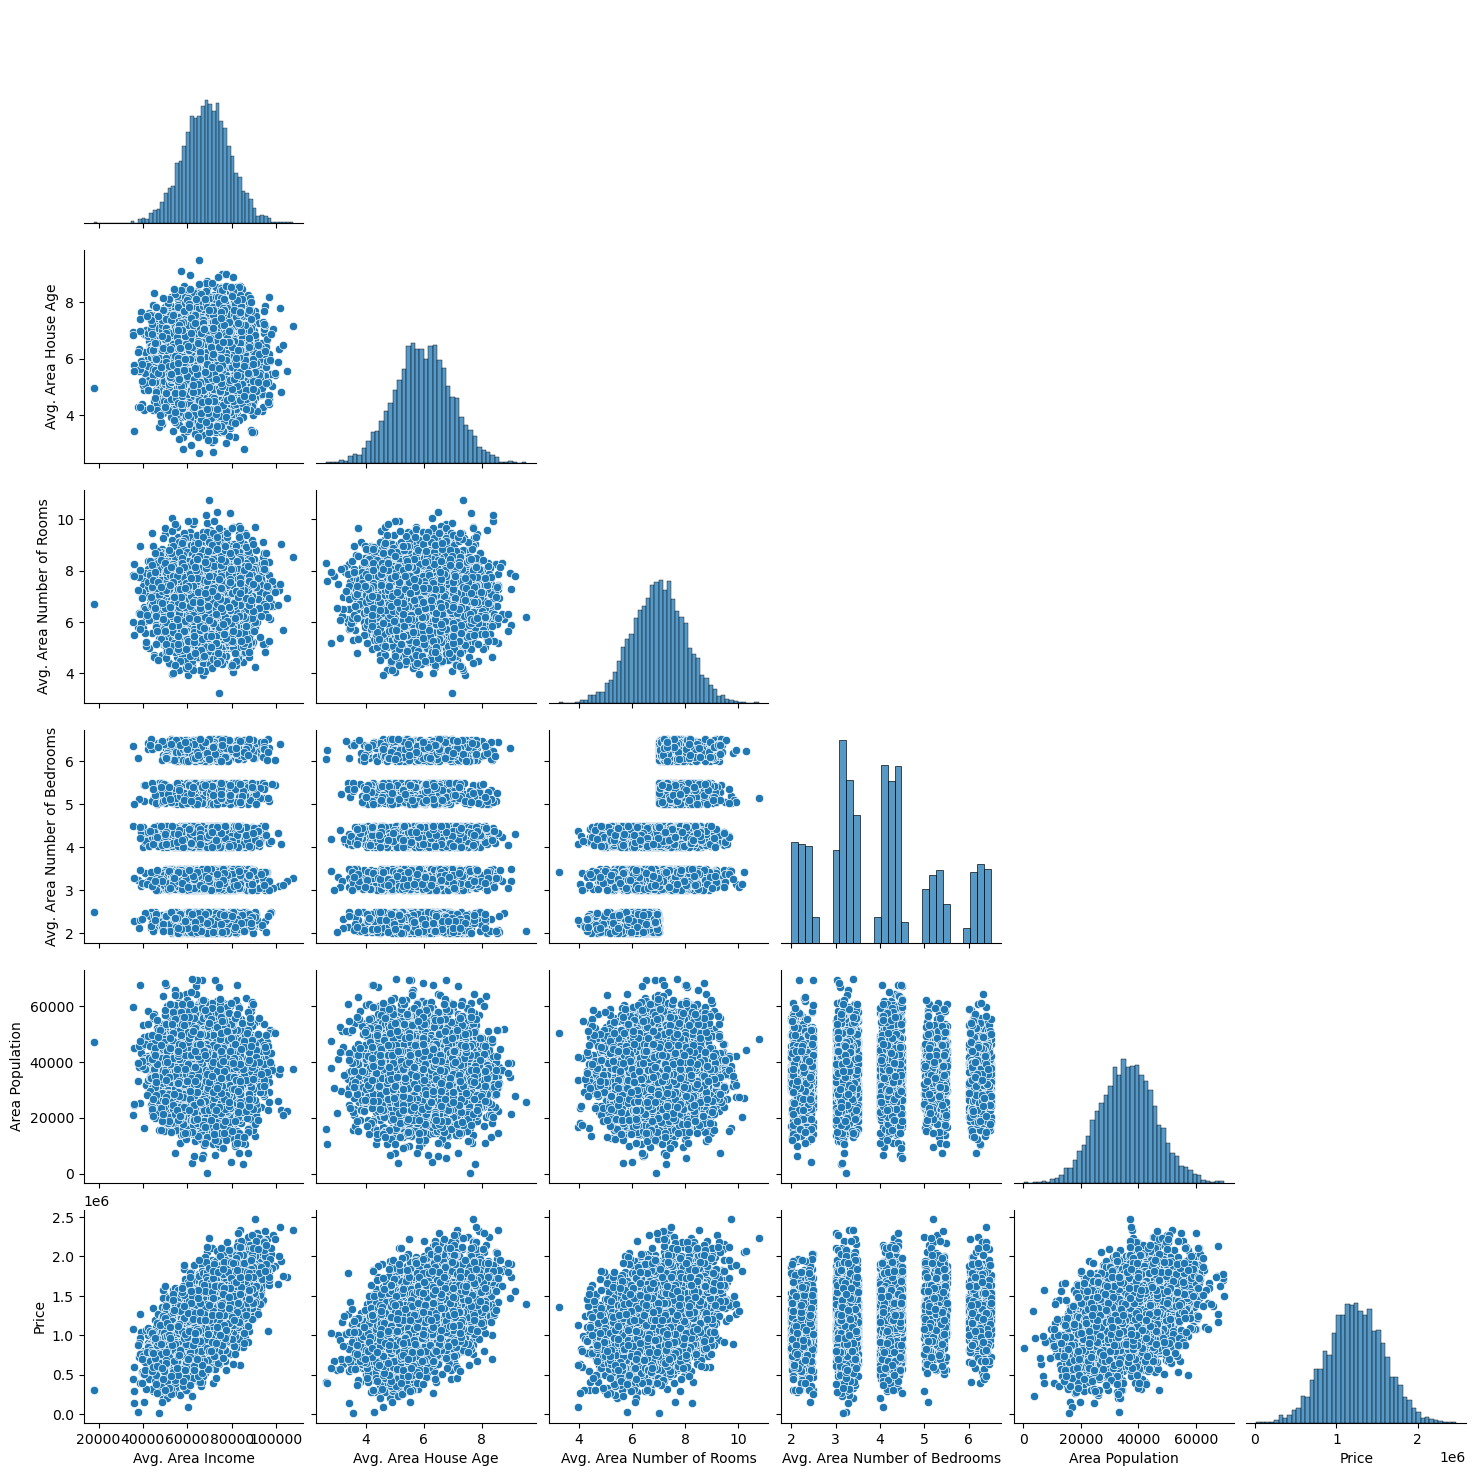

In [22]:
# Create pairwise scatter plots for numerical columns to visualize relationships
# 'corner=True' shows only the lower triangle of the plots to avoid duplicates
sns.pairplot(df, corner=True)


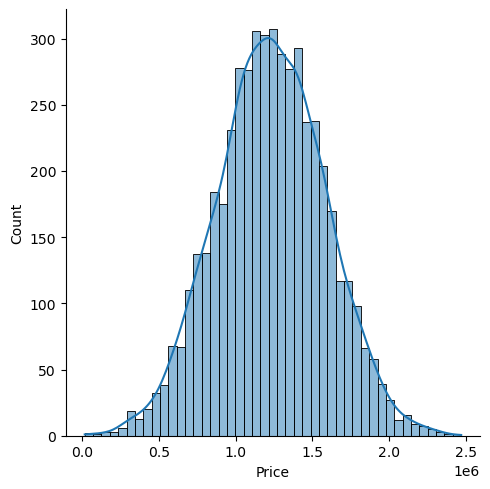

In [24]:
# Plot the distribution of the 'Price' column
# 'kde=True' adds a smooth Kernel Density Estimate curve over the histogram
sns.displot(x='Price', data=df, kde=True)


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

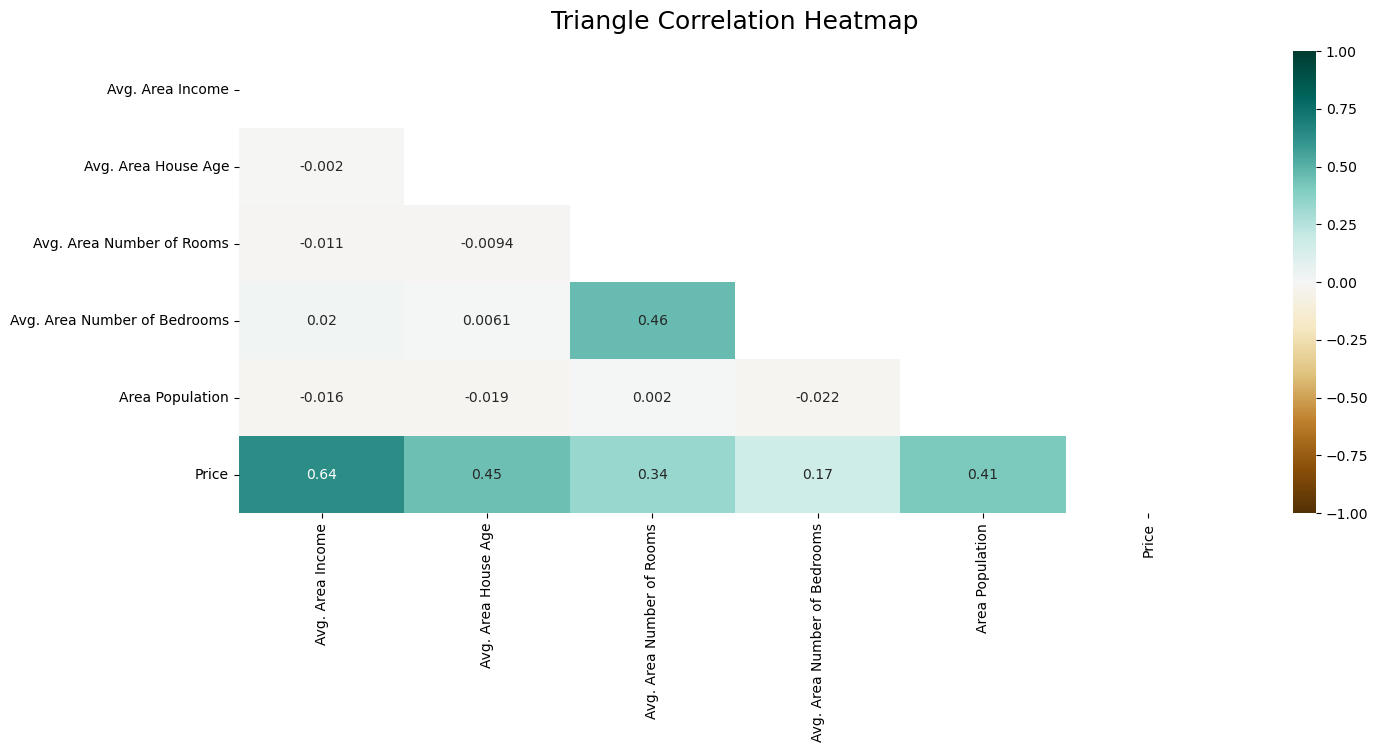

In [26]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Create a triangular mask to display only the lower half of the heatmap 
# (avoids repeating mirrored values)
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))

# Plot a correlation heatmap for numeric columns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    numeric_df.corr(),
    mask=mask,
    vmin=-1, vmax=1,
    annot=True,
    cmap='BrBG'
)

# Set heatmap title with custom font size and padding
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)


<Axes: >

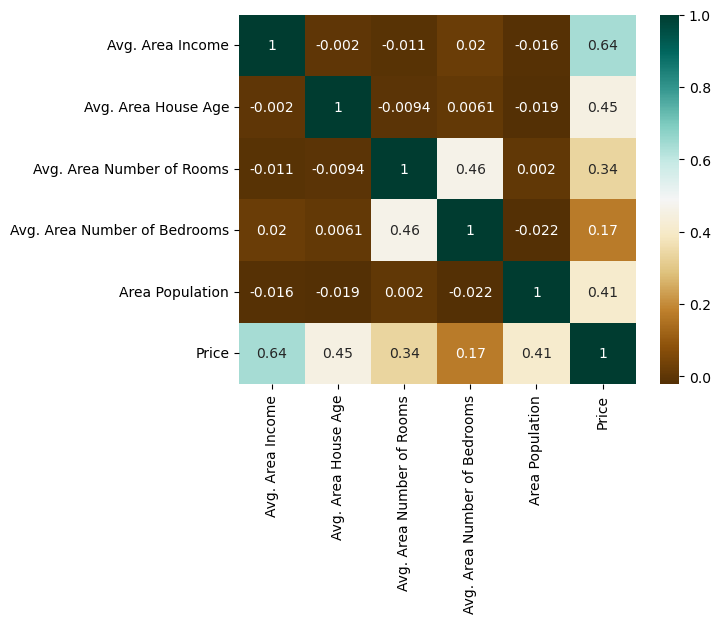

In [28]:
# Plot a correlation heatmap for numeric columns with values annotated
sns.heatmap(numeric_df.corr(), annot=True, cmap='BrBG')


In [36]:
# Prepare data for training a Linear Regression model using Scikit-Learn

# Select input (feature) variables for the model
x = df[['Avg. Area Income',
        'Avg. Area House Age',
        'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms',
        'Area Population']]

# Select target variable (value to predict)
y = df['Price']


In [38]:
#installing scikit-learn
!pip install scikit-learn

In [40]:
# STEP 4: Train-Test Split
# Import function to split the dataset into training and testing sets
# This allows the model to be trained on one portion of the data and tested on another for unbiased evaluation
from sklearn.model_selection import train_test_split

In [42]:
# Split the data into training and testing sets
# - 70% of the data will be used for training, 30% for testing (test_size=0.3)
# - random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
# STEP 5: Create the Linear Regression model
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression

In [48]:
# Initialize the Linear Regression model
lr = LinearRegression()

In [50]:
# Train the Linear Regression model on the training data
# The model learns the relationship between input features (x_train) and target variable (y_train)
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
# STEP 6: Evaluate the model
# Compute the R-squared score of the model on the test data
# This indicates how well the model's predictions match the actual values (1 = perfect fit)
lr.score(x_test, y_test)

0.9146818498753992

In [54]:
# Get the intercept (constant term) of the trained Linear Regression model
# This is the predicted value of y when all input features are zero
lr.intercept_


np.float64(-2638673.4261916303)

In [56]:
# Create a DataFrame to display the coefficients of each feature
# Coefficients indicate how much the target variable (Price) changes with a one-unit change in each feature
pd.DataFrame(lr.coef_, x.columns, columns=['Coefficient'])

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


In [58]:
# STEP 7: Make predictions using the trained model
# Predict target values (Price) for the test set based on input features
predictions = lr.predict(x_test)


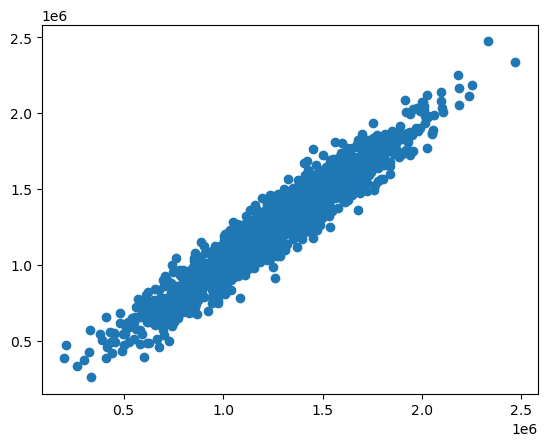

In [60]:
# Create a scatter plot to compare actual vs. predicted values
# This helps visualize how well the model's predictions match the true target values
plt.scatter(y_test, predictions)


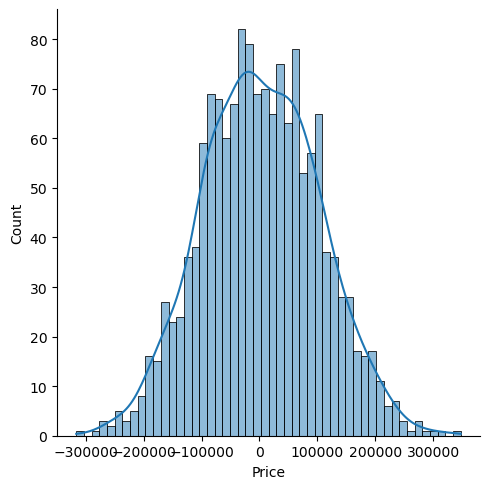

In [62]:
# Plot the distribution of residuals (differences between actual and predicted values)
# 'bins=50' sets the number of histogram bins, 'kde=True' adds a smooth density curve
# Helps check if residuals are normally distributed, which is an assumption of Linear Regression
sns.displot((y_test - predictions), bins=50, kde=True)


In [64]:
# Import metrics to evaluate the performance of the regression model
# - mean_absolute_error: average absolute difference between predicted and actual values
# - mean_squared_error: average squared difference, penalizes larger errors
# - r2_score: proportion of variance in the target explained by the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [66]:
# Evaluate and print regression performance metrics

# Mean Absolute Error: average absolute difference between actual and predicted values
print('MAE:', mean_absolute_error(y_test, predictions))

# Mean Squared Error: average squared difference, penalizes larger errors more
print('MSE:', mean_squared_error(y_test, predictions))

# Root Mean Squared Error: square root of MSE, interpretable in the same units as the target
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

# R-squared: proportion of variance in the target variable explained by the model
print('R_squared:', r2_score(y_test, predictions))


MAE: 81135.56609336873
MSE: 10068422551.401155
RMSE: 100341.52954485573
R_squared: 0.9146818498753992


In [68]:
# Import functions for cross-validation
# - cross_val_score: evaluate model performance using k-fold cross-validation
# - cross_val_predict: generate cross-validated predictions for each input data point
from sklearn.model_selection import cross_val_score, cross_val_predict


In [70]:
# Compute the R-squared score of the Linear Regression model on the test data
# Measures how well the model's predictions match the actual values (1 = perfect fit)
lr.score(x_test, y_test)

0.9146818498753992

In [72]:
# Perform 4-fold cross-validation on the test data
# Returns an array of R-squared scores for each fold, providing a more robust evaluation of model performance
cross_val_score(lr, x_test, y_test, cv=4)

array([0.92160875, 0.90602627, 0.91740387, 0.90772772])

In [74]:
# Calculate the average R-squared score across the 4 cross-validation folds
# Provides an overall assessment of model performance
cross_val_score(lr, x_test, y_test, cv=4).mean()

np.float64(0.9131916509839232)

In [76]:
# Generate cross-validated predictions for each data point in the test set using 5 folds
# Each prediction is made by a model that was not trained on that data point
cross_val_predict(lr, x_test, y_test, cv=5)


array([1310757.7373826 , 1239845.04733787, 1247171.37372185, ...,
       1464796.52298762, 1485136.81037101, 1057122.18668421])